In [1]:
# MNIST 데이터셋 불러오기
import tensorflow as tf
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.shape, train_images.shape)
print(train_labels.shape, test_labels.shape)


AttributeError: partially initialized module 'charset_normalizer' has no attribute 'md__mypyc' (most likely due to a circular import)

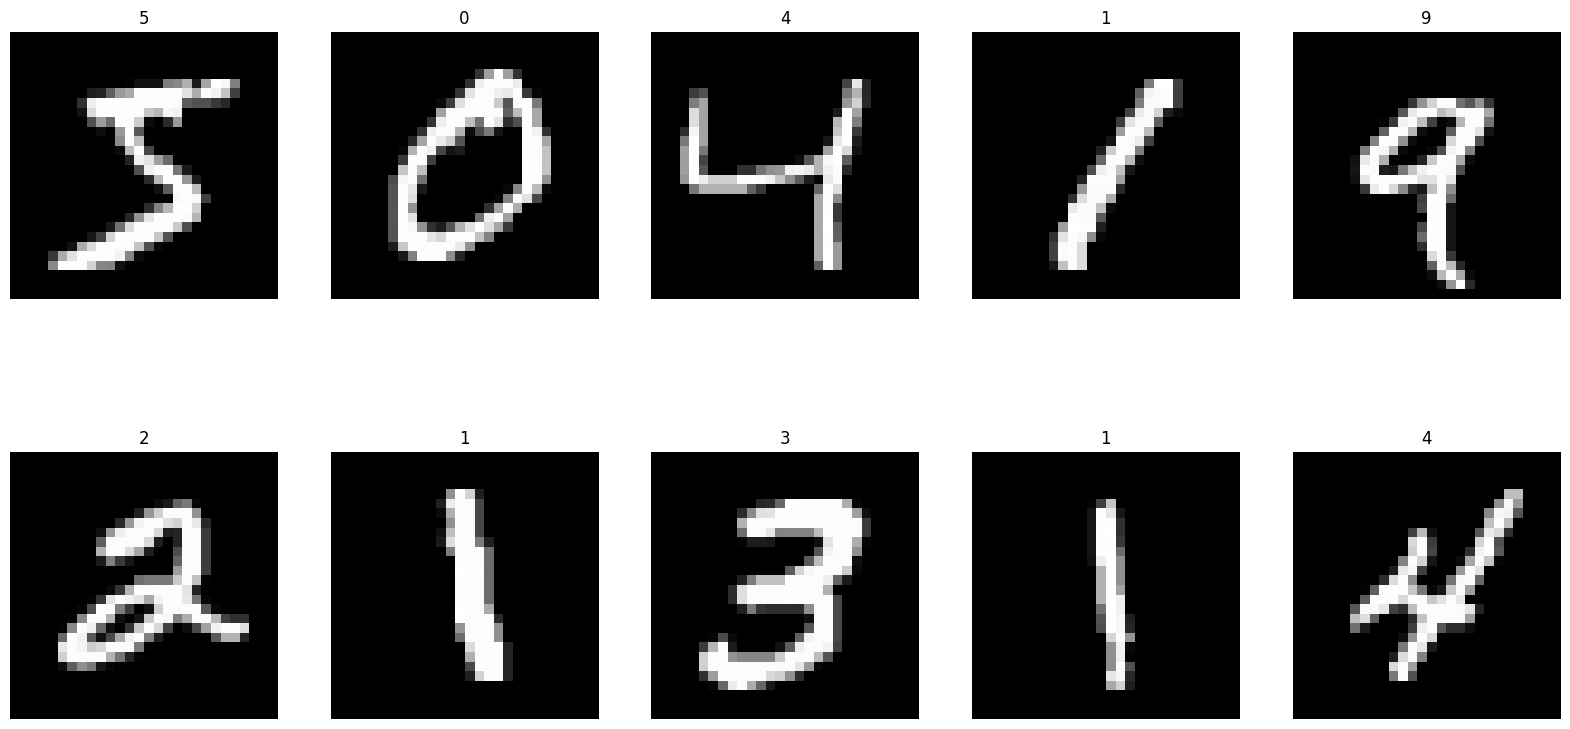

In [2]:
# MNIST 데이터셋 그려보기
figure = plt.figure()
figure.set_size_inches(20, 10)

for i in range(10):
    ax = figure.add_subplot(2, 5, i+1)
    ax.imshow(train_images[i], cmap='gray')
    ax.set_title(train_labels[i])
    ax.axis('off')
plt.show()

In [3]:
# # 학습 레이블의 형태를 [N, 1] 형태로 변경 (N은 데이터 개수)
# train_labels = train_labels.reshape([-1, 1])

# # 학습 이미지와 레이블을 텐서플로우 변수로 변환
# # dtype=tf.float32로 지정하여 32비트 부동소수점 형태로 저장
# data_images = tf.Variable(train_images, dtype=tf.float32)
# data_labels = tf.Variable(train_labels, dtype=tf.float32)

# # 원-핫 인코딩 적용
# # 예: 3이라는 레이블은 [0,0,0,1,0,0,0,0,0,0] 형태로 변환됨
# data_labels_hot = tf.one_hot(train_labels.astype(np.int32), depth=10)

In [4]:
import tensorflow as tf

# 데이터 전처리 (정규화 및 reshape)
train_images = train_images.reshape(-1, 28 * 28) / 255.0
test_images = test_images.reshape(-1, 28 * 28) / 255.0

# 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation='relu', input_shape=(784,)),  # 첫 번째 은닉층 (ReLU)
    tf.keras.layers.Dense(100, activation='relu'),                      # 두 번째 은닉층 (ReLU)
    tf.keras.layers.Dense(10, activation='softmax')                     # 출력층 (Softmax)
])

# 모델 컴파일
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # 교차 엔트로피 손실 함수
    metrics=['accuracy']
)

# 모델 학습
history = model.fit(
    train_images, train_labels,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.ModelCheckpoint(
            './weight/model.h5',
            save_best_only=True,
            monitor='val_loss'
        ),
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=20
        )
    ]
)

Epoch 1/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2271 - accuracy: 0.9322 - val_loss: 0.1491 - val_accuracy: 0.9547
Epoch 2/100
 128/1500 [=>............................] - ETA: 1s - loss: 0.1066 - accuracy: 0.9668

/Users/choeuje/anaconda3/envs/projects/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 2s 1ms/step - loss: 0.0915 - accuracy: 0.9721 - val_loss: 0.0955 - val_accuracy: 0.9707
Epoch 3/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0625 - accuracy: 0.9802 - val_loss: 0.0927 - val_accuracy: 0.9730
Epoch 4/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0446 - accuracy: 0.9860 - val_loss: 0.0926 - val_accuracy: 0.9738
Epoch 5/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0353 - accuracy: 0.9882 - val_loss: 0.0918 - val_accuracy: 0.9749
Epoch 6/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0282 - accuracy: 0.9906 - val_loss: 0.1018 - val_accuracy: 0.9721
Epoch 7/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0247 - accuracy: 0.9916 - val_loss: 0.1049 - val_accuracy: 0.9735
Epoch 8/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0201 - accuracy: 0.9931 - val_loss: 0.1169 - val_accuracy: 0.97